<a href="https://colab.research.google.com/github/AndrewCrossman/DSPS_ACrossman/blob/main/LAB/Fit_Models_to_Microlensing_lightcurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting two models to Microlensing photometry

In this exercise, we will fit a Gaussian distribution and a Cauchy distribution to a light curve of a single-lens microlensing event. 

    

# initial imports

In [1]:
!pip install emcee
!pip install corner

     |████████████████████████████████| 45 kB 1.3 MB/s 


We will also need these packags: pandas, matplotlib, numpy, emcee, corner

In [6]:
import numpy as np
import pandas as ps
import emcee
import corner
import matplotlib.pyplot as plt

from scipy.optimize import minimize
%matplotlib inline

# Read in the input dataset

In [4]:
# Path to OGLE data: https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/OGLE_2012_BLG_1323.csv
# Path to Roman data: https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/mag.dcnormffp_0_82_1902.det.lc.W149.csv 
OGLE = ps.read_csv("https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/OGLE_2012_BLG_1323.csv")
Roman = ps.read_csv("https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/mag.dcnormffp_0_82_1902.det.lc.W149.csv")

#Visualize the data

(165.46030599996448, 167.46030599996448)

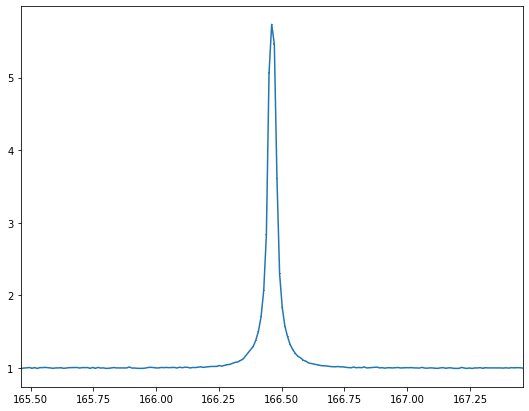

In [12]:
plt.figure(figsize=(9,7))
plt.errorbar(Roman.t,Roman.A,yerr=Roman.A_err)
dt = 1
peak = Roman.t[np.argmax(Roman.A)]
plt.xlim(peak-dt, peak+dt)

# Define the PSPL model and the Cauchy distributions


PSPL model:

$F(t) = f_s \times A(t) + (1-f_s)$

$A(t) = \frac{u(t)^2 +2}{u(t)\times \sqrt{u(t)^2 + 4}}$

$u(t) = \sqrt {{u_0}^2+ ({\frac {t-t_0}{t_E}})^2}$

Cauchy model:

$C(t) = 1+ \frac {amp}{{1+|\frac{t-t_0}{\sigma}|}^{2b}}$


In [13]:
def PSPL(x,xo,tE,u0,fs):
  u = np.sqrt((u0*u0) + ((x-x0)/ tE)**2)
  A = (u*u+2)/(u*np.sqrt(u*u+4))
  F = fs*A + (1-fs)
  return (F)
def Cauchy(x, amp, xo, sigma,b):
  denom = 1 + np.abs((x-x0)/sigma)**(2*b)
  return (1+amp/denom)
def L1(arg, x, y, func=PSPL):
  return (np.sum(abs(y - func(x, *arg))))
def L2(arg, x, y, func=PSPL):
  return (np.sum(y - func(x, *arg))**2)
def Chi2(arg, x, y, s, func=PSPL):
  return (np.sum(((y - func(x, *arg)/ s)**2)))
def line(a,b,x):
  return (a*x+b)

# Fit the two functions to the data by minimizing an objective function 


Use the l1 function as your objective function.

In [16]:
# Fitting the PSPL function to data by minimizing L1
x = Roman.t.values
y = Roman.A.values
# initial guesses for PSPL function: x0, tE, u0, fs
initialGuesses = [peak, 1, .02, .46]
minimize(L1, initialGuesses, args = (x, y, PSPL))

NameError: ignored

In [ ]:
# Fitting the Cauchy function to data by minimizing L1

.
.
.
.

In [ ]:
# Visualizing the results

plt.figure(figsize=(15,9))

.
.
.
.

# Fit the two functions to the data by minimizing an objective function 


Use the l2 function as your objective function.

In [ ]:
# Fitting the PSPL function to data by minimizing L2

.
.
.
.

In [ ]:
# Fitting the Cauchy function to data by minimizing L2

.
.
.
.

In [ ]:
# Visualizing the results

plt.figure(figsize=(15,9))

.
.
.
.


# Fit the two functions to the data by minimizing an objective function 


Use the ${\chi}^2$ function as your objective function.

In [ ]:
# Fitting the PSPL function to data by minimizing the chi-squared function


.
.
.
.

In [ ]:
# Fitting the Cauchy function to data by minimizing the chi-squared function


.
.
.
.

In [ ]:
# Visualizing the results

plt.figure(figsize=(15,9))

.
.
.
.


# Now let's fit a PSPL and a Cauchy with MCMC!



For fitting a PSPL model:

In [ ]:
# define log likelihood function
def log_likelihood....

.
.
.
.


In [ ]:
# define log prior function

def log_prior...


.
.
.
.


In [ ]:
# define log probability function

def log_probability...

.
.
.
.


In [ ]:
#initial guess
ig = [peak, .1, 0.02, 0.464796]

In [ ]:
#initialize walkers
nwalkers = 32
ndim = len(ig)

In [ ]:
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim)

In [ ]:
pos.shape

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, s))

In [ ]:
sampler.run_mcmc(pos, 5000, progress=True);

In [ ]:
samples = sampler.get_chain()

In [ ]:
samples.shape

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

In [ ]:
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
  mcmc[i] = np.percentile( flat_samples[:,i], [16, 50, 84])
params_PSPL = mcmc[:,1]

In [ ]:
plt.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["t0", "tE", "u0", "fs"], truths=mcmc[:,1]);


In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
# zoom in: the beginning of the chain should be cut
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 100)#len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

For fitting a Cauchy distribution:

In [ ]:
def log_prior....


In [ ]:
def log_likelihood....

In [ ]:
def log_probability....

In [ ]:
#initial guess
ig = [max(y), peak, 1, .1]

In [ ]:
#initialize walkers
nwalkers = 32
ndim = len(ig)

In [ ]:
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim)

In [ ]:
pos.shape

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, s))

In [ ]:
sampler.run_mcmc(pos, 5000, progress=True);

In [ ]:
samples = sampler.get_chain()

In [ ]:
samples.shape

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

In [ ]:
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
  mcmc[i] = np.percentile( flat_samples[:,i], [16, 50, 84])
params_cauchy = mcmc[:,1]

In [ ]:

plt.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["Amplitude","x0","flattness","sigma"], truths=mcmc[:,1]);


In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
# zoom in: the beginning of the chain should be cut
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 100)#len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
plt.figure(figsize=(15,9))
dt = .1
x_new = np.linspace(min(x), max(x), len(x)*100)
plt.errorbar(df.t,df.A, yerr=df.A_err, fmt = '-o', ms=16,color='grey', zorder = -10, label = 'data')
plt.plot(x_new, PSPL(x_new, *params_PSPL),linewidth=3,color='red', label = 'PSPL fit')
plt.plot(x_new, cauchy(x_new, *params_cauchy),linewidth=3,color = 'orange', label = 'Cauchy fit')
peak = df.t[np.argmax(df.A)]
plt.xlim(peak-dt,peak+dt)
plt.xlabel('Time-peak (days)')
plt.ylabel('Magnification')
plt.legend()